In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path
import os

In [2]:
#provide paths

consolidated_data = Path("Resources/StockDataConsolidated.csv")
spy_data = Path("Resources/Spy_prices.csv")

# Read the CSV files
stock_data_df = pd.read_csv(consolidated_data)
spy_df = pd.read_csv(spy_data)

# Convert 'Date' column to datetime format
stock_data_df["Date"] = pd.to_datetime(stock_data_df["Date"], format = "%m/%d/%y")
spy_df["Date"] = pd.to_datetime(spy_df["Date"], format="%m/%d/%y")

# Display the DataFrame to verify the changes
spy_df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,SPY,476.299988,477.850006,473.850006,477.709991,461.611755,72668200
1,2022-01-04,SPY,479.220001,479.980011,475.579987,477.549988,461.457123,71178700
2,2022-01-05,SPY,477.160004,477.980011,468.279999,468.380005,452.596191,104538900
3,2022-01-06,SPY,467.890015,470.820007,465.429993,467.940002,452.171021,86858900
4,2022-01-07,SPY,467.950012,469.200012,464.649994,466.089996,450.383331,85111600


# Calculate Statistical Measures 

In [3]:
#Dropping empty values
stock_data_df = stock_data_df.dropna()
stock_data_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,NVDA,2013-01-02,3.140000,3.182500,3.127500,3.180000,2.935840,47883600
1,NVDA,2013-01-03,3.180000,3.217500,3.145000,3.182500,2.938147,29888800
2,NVDA,2013-01-04,3.187500,3.297500,3.177500,3.287500,3.035086,52496800
3,NVDA,2013-01-07,3.285000,3.295000,3.170000,3.192500,2.947381,61073200
4,NVDA,2013-01-08,3.200000,3.210000,3.100000,3.122500,2.882755,46642400
...,...,...,...,...,...,...,...,...
8549,AI,2023-12-22,29.700001,29.950001,28.420000,28.740000,28.740000,9783900
8550,AI,2023-12-26,28.900000,29.889999,28.659000,29.469999,29.469999,7758200
8551,AI,2023-12-27,29.709999,30.459999,29.400000,30.049999,30.049999,9300300
8552,AI,2023-12-28,30.000000,31.129999,29.790001,30.230000,30.230000,8979400


In [4]:
#Calculate statistical measures including rate of return, mean, standard deviation, 
stock_data_list = ["NVDA","META","AMD","AI"]

In [5]:
# Calculating the overal percent change for all stocks
data = stock_data_df

# Creating a for loop to calculate the overall percent change for all stocks
for stocks in stock_data_list:
    # The data for AI stocks starts in 2023
    if stocks == 'AI':
        start_date = "1/3/23"
        end_date = "12/29/23"
    else:
        start_date = "1/2/13"
        end_date = "12/29/23"
    
    open_value = data[(data['Ticker'] == stocks) & (data['Date'] == start_date)]["Open"]
    
    close_value = data[(data['Ticker'] == stocks) & (data['Date'] == end_date)]["Close"]
    
    # Calculate change from first to last day price
    pct_change = ((close_value.item()-open_value.item())/(open_value.item())) *100
    
    print(f"Overall {stocks} Percent Change: {round(pct_change, 2)} %")

Overall NVDA Percent Change: 15671.34 %
Overall META Percent Change: 1189.94 %
Overall AMD Percent Change: 5680.78 %
Overall AI Percent Change: 151.18 %


In [6]:
# Creating a column for the percent change
stock_data_df['Pct_Change'] = ((stock_data_df['Close'] - stock_data_df['Open']) / stock_data_df['Open']) * 100

# Calculate the overall rate of return for each stock
for stock_symbol in stock_data_df['Ticker'].unique():
    # Find rows in the DataFrame where the stock ticker matches 'Ticker'.
    stock_mask = stock_data_df['Ticker'] == stock_symbol

    if stock_mask.any():
        # Calculate the overall rate of return using the product of 1 plus the daily percentage changes.
        daily_returns = 1 + stock_data_df.loc[stock_mask, 'Pct_Change'] / 100
        overall_return = daily_returns.prod() - 1
        print(f"Overall rate of return for {stock_symbol}: {overall_return * 100:.2f}%")
    else:
        print(f"Ticker '{stock_symbol}' not found in DataFrame.")

Overall rate of return for NVDA: 649.74%
Overall rate of return for META: 222.34%
Overall rate of return for AMD: 37.90%
Overall rate of return for AI: 37.47%


In [7]:
# Calculate the mean of the change in percent change.
group_df = stock_data_df[['Ticker', 'Pct_Change']]
avg_df = group_df.groupby("Ticker").mean() *100
avg_df=avg_df.rename(columns={"Pct_Change": "Average Daily Percent Change"}) 

avg_df

,Average Daily Percent Change
Ticker,
AI,29.336884
AMD,5.395350
META,5.726692
NVDA,9.730892


In [8]:
# Calculate summary statistics using the aggregation method for close price
grouped_stock_df = stock_data_df.groupby(["Ticker"])
summary_stat_df = grouped_stock_df["Close"].agg(["mean", "median", "var", "std", "sem"]) 
summary_stat_df.head()

,mean,median,var,std,sem
Ticker,,,,,
AI,27.408920,26.990000,56.499149,7.516592,0.475391
AMD,39.497142,16.260000,1754.150927,41.882585,0.796068
META,165.142384,162.514999,7682.749918,87.651297,1.666001
NVDA,91.825790,45.040001,13419.247474,115.841476,2.201816


# Comparative Analysis

In [9]:
#Creating Data Frame for each ticker
nvda_stock_df =  stock_data_df[stock_data_df["Ticker"]=="NVDA"].reset_index(drop=True)
meta_stock_df =  stock_data_df[stock_data_df["Ticker"]=="META"].reset_index(drop=True)
amd_stock_df =  stock_data_df[stock_data_df["Ticker"]=="AMD"].reset_index(drop=True)
ai_stock_df =  stock_data_df[stock_data_df["Ticker"]=="AI"].reset_index(drop=True)

In [10]:
#Calculate moving averages for each stock
#Moving_Average_Days=[10,50, 200]
#there are 252 trading days in a year.
nvda_stock_df['Rolling_Avg_10_days'] = nvda_stock_df['Close'].rolling(window=10, center=False).mean()
nvda_stock_df['Rolling_Avg_50_days'] = nvda_stock_df['Close'].rolling(window=50, center=False).mean()
nvda_stock_df['Rolling_Avg_200_days'] = nvda_stock_df['Close'].rolling(window=200, center=False).mean()

meta_stock_df['Rolling_Avg_10_days'] = meta_stock_df['Close'].rolling(window=10, center=False).mean()
meta_stock_df['Rolling_Avg_50_days'] = meta_stock_df['Close'].rolling(window=50, center=False).mean()
meta_stock_df['Rolling_Avg_200_days'] = meta_stock_df['Close'].rolling(window=200, center=False).mean()

amd_stock_df['Rolling_Avg_10_days'] = amd_stock_df['Close'].rolling(window=10, center=False).mean()
amd_stock_df['Rolling_Avg_50_days'] = amd_stock_df['Close'].rolling(window=50, center=False).mean()
amd_stock_df['Rolling_Avg_200_days'] = amd_stock_df['Close'].rolling(window=200, center=False).mean()

ai_stock_df['Rolling_Avg_10_days'] = ai_stock_df['Close'].rolling(window=10, center=False).mean()
ai_stock_df['Rolling_Avg_50_days'] = ai_stock_df['Close'].rolling(window=50, center=False).mean()
ai_stock_df['Rolling_Avg_200_days'] = ai_stock_df['Close'].rolling(window=200, center=False).mean()

# Check rolling average values
nvda_stock_df.head(30).tail(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Rolling_Avg_10_days,Rolling_Avg_50_days,Rolling_Avg_200_days
20,NVDA,2013-01-31,3.0800,3.1150,3.0450,3.0650,2.829670,47054400,-0.487013,3.06975,NaN,NaN
21,NVDA,2013-02-01,3.0900,3.1025,3.0650,3.0925,2.855059,28881600,0.080906,3.07275,NaN,NaN
22,NVDA,2013-02-04,3.0750,3.1375,3.0375,3.0400,2.806589,51174400,-1.138211,3.07250,NaN,NaN
23,NVDA,2013-02-05,3.0550,3.1275,3.0450,3.1100,2.871215,36729600,1.800327,3.08075,NaN,NaN
24,NVDA,2013-02-06,3.0350,3.1100,3.0175,3.0850,2.848134,53068800,1.647446,3.08600,NaN,NaN
25,NVDA,2013-02-07,3.0750,3.1000,3.0425,3.0725,2.836595,44000000,-0.081301,3.08850,NaN,NaN
26,NVDA,2013-02-08,3.0925,3.1175,3.0725,3.0925,2.855059,30723200,0.000000,3.08750,NaN,NaN
27,NVDA,2013-02-11,3.1175,3.1600,3.0875,3.1275,2.887372,40830800,0.320770,3.08500,NaN,NaN
28,NVDA,2013-02-12,3.1000,3.1425,3.0950,3.1075,2.868907,27780400,0.241935,3.08725,NaN,NaN
29,NVDA,2013-02-13,3.1100,3.1675,3.0825,3.0925,2.855059,85639600,-0.562701,3.08850,NaN,NaN


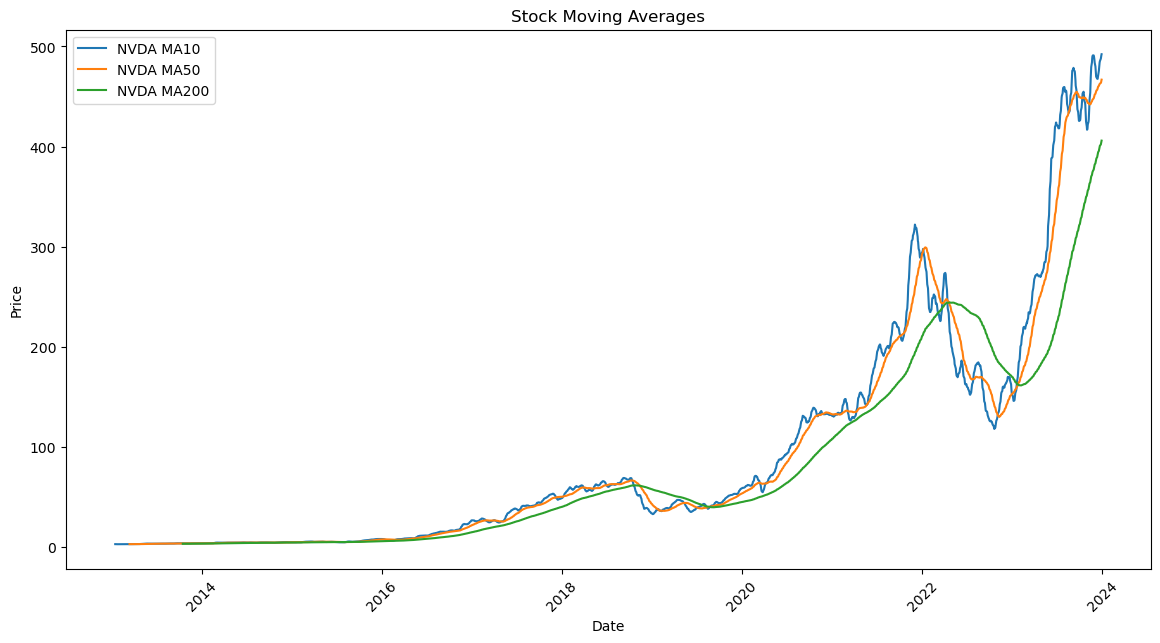

In [11]:
# Plotting the moving averages for NVDA
plt.figure(figsize=(14, 7))

# NVDA
plt.plot(nvda_stock_df['Date'], nvda_stock_df['Rolling_Avg_10_days'] , label='NVDA MA10')
plt.plot(nvda_stock_df['Date'], nvda_stock_df['Rolling_Avg_50_days'] , label='NVDA MA50')
plt.plot(nvda_stock_df['Date'], nvda_stock_df['Rolling_Avg_200_days'], label='NVDA MA200')


plt.title('Stock Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Using longer moving averages results in a smoother plot because they are less influenced by daily fluctuations. Despite a slight dip in NVDA stock ,it has generally been trending upward For the 10, 50 and 200 MA .

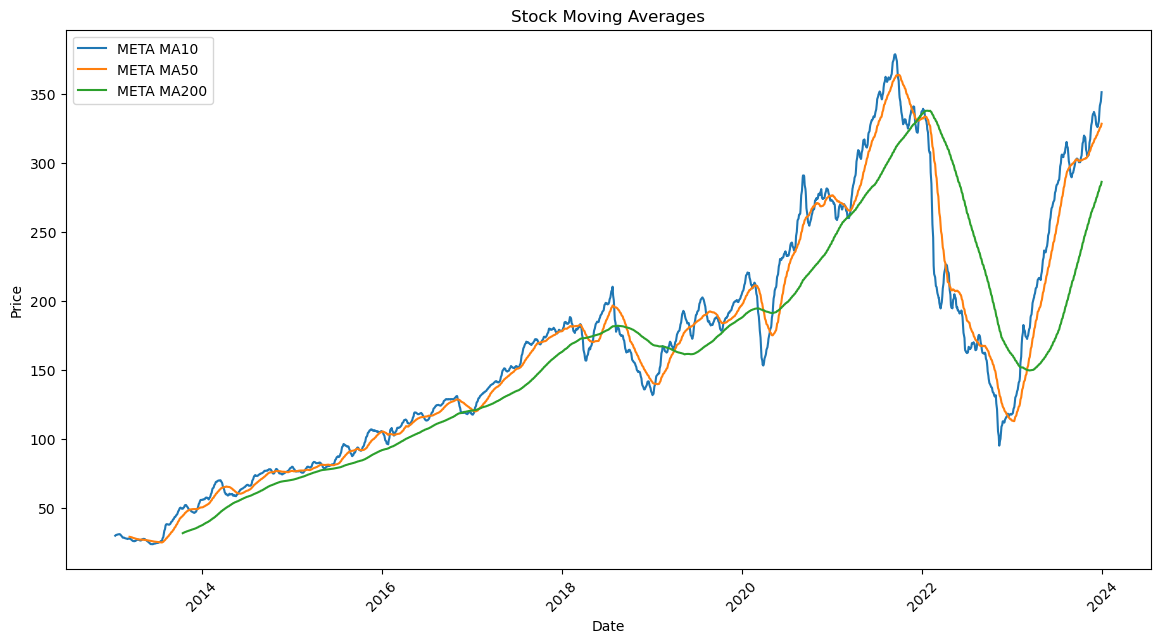

In [12]:
# Plotting the moving averages for META
plt.figure(figsize=(14,7))


# META
plt.plot(meta_stock_df['Date'], meta_stock_df['Rolling_Avg_10_days'] , label='META MA10')
plt.plot(meta_stock_df['Date'], meta_stock_df['Rolling_Avg_50_days'] , label='META MA50')
plt.plot(meta_stock_df['Date'], meta_stock_df['Rolling_Avg_200_days'], label='META MA200')


plt.title('Stock Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### META has been trading upward but the upward trend was interrupted  in October 2023 due to negative return report and news regarding slowdown in digital advertising, and new security procols on devices. we can see a golden crossover where the 50 day MA crosses over the 200 MA which is considered a bullish signal , suggesting that the sock or market is trending upward 

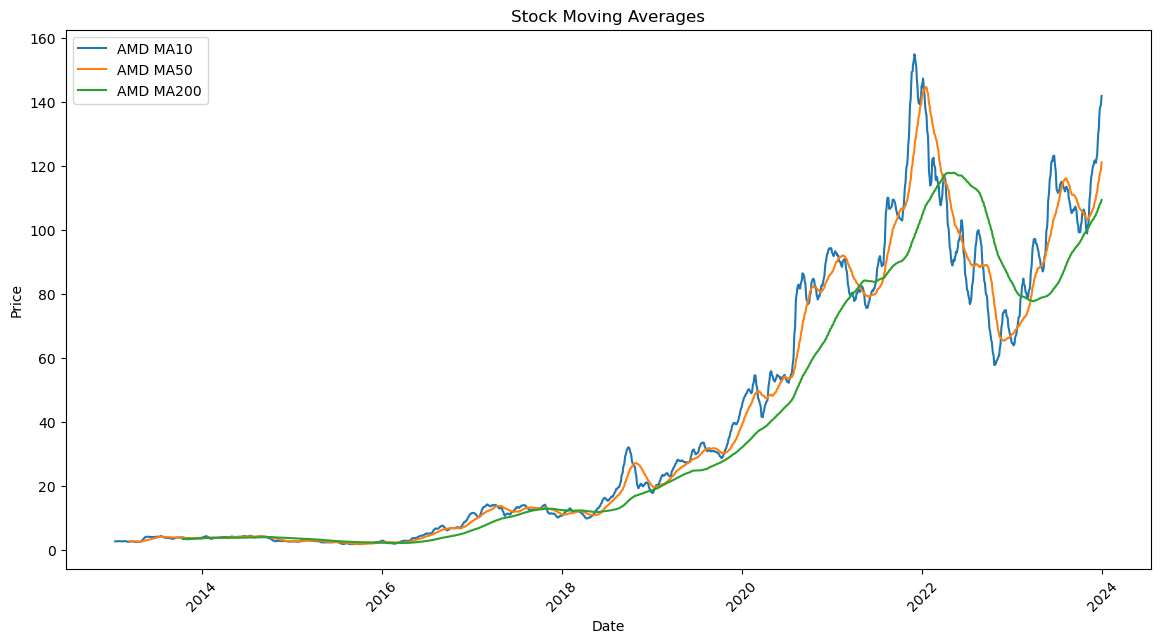

In [13]:
# Plotting the moving averages for AMD
plt.figure(figsize=(14, 7))

# AMD
plt.plot(amd_stock_df['Date'],amd_stock_df['Rolling_Avg_10_days'] , label='AMD MA10')
plt.plot(amd_stock_df['Date'],amd_stock_df['Rolling_Avg_50_days'] , label='AMD MA50')
plt.plot(amd_stock_df['Date'],amd_stock_df['Rolling_Avg_200_days'], label='AMD MA200')


plt.title('Stock Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### AMD has been on an incredible uptrend rally thanks to the AI company's opportunities that get a lot of investors excited

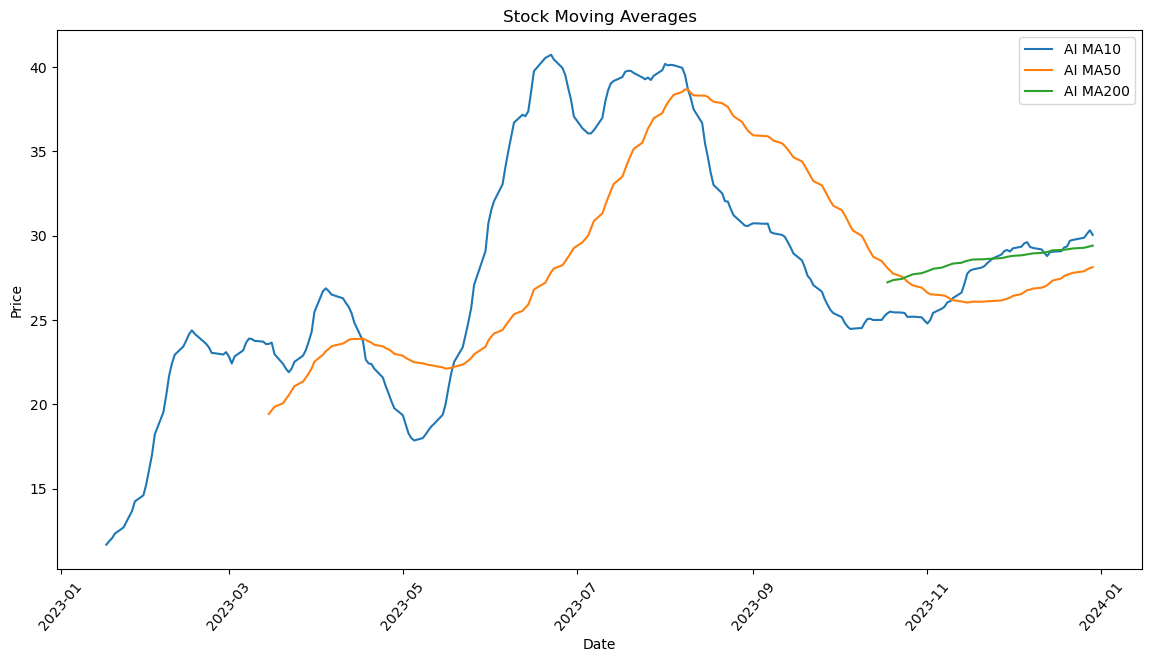

In [14]:
# Plotting the moving averages for AI
plt.figure(figsize=(14, 7))

# AI
plt.plot(ai_stock_df['Date'], ai_stock_df['Rolling_Avg_10_days'] , label='AI MA10')
plt.plot(ai_stock_df['Date'], ai_stock_df['Rolling_Avg_50_days'] , label='AI MA50')
plt.plot(ai_stock_df['Date'], ai_stock_df['Rolling_Avg_200_days'], label='AI MA200')


plt.title('Stock Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=50)
plt.show()

#### AI C3.AI (AI) has been following an upward Channel Up pattern . The stock held the 1-day MA200 (orange trend-line), the stochastic indicator is at the pattern’s bottom (Higher Lows trend-line), with the 1-day MA200 acting as support. 
#### Additionally, this is showing a Bullish Divergence, with  the price is making Lower Lows. This suggests that now is an optimal time to buy. As long as the price remains within the Channel Up pattern, this remains a favorable entry point.



In [15]:
# Calculate the moving percentage change for NVDA's close price for 1, 3, 5, and 10 years time periods
nvda_returns = pd.DataFrame()
nvda_returns['Date'] = nvda_stock_df['Date']
nvda_returns['NVDA_Return_1'] = nvda_stock_df['Close'].pct_change(periods=252) * 100  # 252 trading days in a year
nvda_returns['NVDA_Return_3'] = nvda_stock_df['Close'].pct_change(periods=252*3) * 100
nvda_returns['NVDA_Return_5'] = nvda_stock_df['Close'].pct_change(periods=252*5) * 100
nvda_returns['NVDA_Return_10'] = nvda_stock_df['Close'].pct_change(periods=252*10) * 100

# Display the returns DataFrame
nvda_returns

,Date,NVDA_Return_1,NVDA_Return_3,NVDA_Return_5,NVDA_Return_10
0,2013-01-02,NaN,NaN,NaN,NaN
1,2013-01-03,NaN,NaN,NaN,NaN
2,2013-01-04,NaN,NaN,NaN,NaN
3,2013-01-07,NaN,NaN,NaN,NaN
4,2013-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2763,2023-12-22,195.921461,266.254763,1345.743772,12649.346945
2764,2023-12-26,221.266062,271.125717,1421.308879,12716.385150
2765,2023-12-27,224.983572,279.860497,1455.461168,12498.343225
2766,2023-12-28,250.697526,281.121694,1388.264376,12453.105222


In [16]:
# Calculate the moving percentage change for META's close price for 1, 3, 5, and 10 years time periods
meta_returns = pd.DataFrame()
meta_returns['Date'] = meta_stock_df['Date']
meta_returns['META_Return_1'] = meta_stock_df['Close'].pct_change(periods=252) * 100  # 252 trading days in a year
meta_returns['META_Return_3'] = meta_stock_df['Close'].pct_change(periods=252*3) * 100
meta_returns['META_Return_5'] = meta_stock_df['Close'].pct_change(periods=252*5) * 100
meta_returns['META_Return_10'] = meta_stock_df['Close'].pct_change(periods=252*10) * 100

# Display the returns DataFrame
meta_returns

,Date,META_Return_1,META_Return_3,META_Return_5,META_Return_10
0,2013-01-02,NaN,NaN,NaN,NaN
1,2013-01-03,NaN,NaN,NaN,NaN
2,2013-01-04,NaN,NaN,NaN,NaN
3,2013-01-07,NaN,NaN,NaN,NaN
4,2013-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2763,2023-12-22,195.081838,29.546539,164.910068,535.936683
2764,2023-12-26,202.962754,32.850347,183.977587,544.559479
2765,2023-12-27,203.142989,33.463879,188.433010,549.183588
2766,2023-12-28,206.570856,34.001502,167.044288,520.252738


In [17]:
# Calculate the moving percentage change for AMD's close price for 1, 3, 5, and 10 years time periods
amd_returns = pd.DataFrame()
amd_returns['Date'] = amd_stock_df['Date']
amd_returns['AMD_Return_1'] = amd_stock_df['Close'].pct_change(periods=252) * 100  # 252 trading days in a year
amd_returns['AMD_Return_3'] = amd_stock_df['Close'].pct_change(periods=252*3) * 100
amd_returns['AMD_Return_5'] = amd_stock_df['Close'].pct_change(periods=252*5) * 100
amd_returns['AMD_Return_10'] = amd_stock_df['Close'].pct_change(periods=252*10) * 100

amd_returns

,Date,AMD_Return_1,AMD_Return_3,AMD_Return_5,AMD_Return_10
0,2013-01-02,NaN,NaN,NaN,NaN
1,2013-01-03,NaN,NaN,NaN,NaN
2,2013-01-04,NaN,NaN,NaN,NaN
3,2013-01-07,NaN,NaN,NaN,NaN
4,2013-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2763,2023-12-22,106.264784,49.737211,678.149377,3724.657699
2764,2023-12-26,124.569373,53.939457,747.076220,3829.041205
2765,2023-12-27,126.394938,59.552160,777.297339,3858.536775
2766,2023-12-28,135.119322,62.030278,731.061425,3866.933200


In [18]:
# Calculate the moving percentage change for IA's close price for 1, 3, 5, and 10 years time periods
ia_returns = pd.DataFrame()
ia_returns['Date'] = ai_stock_df['Date']
ia_returns['IA_Return_1'] = ai_stock_df['Close'].pct_change(periods=252) * 100  # 252 trading days in a year
ia_returns['IA_Return_3'] = ai_stock_df['Close'].pct_change(periods=252*3) * 100
ia_returns['IA_Return_5'] = ai_stock_df['Close'].pct_change(periods=252*5) * 100
ia_returns['IA_Return_10'] = ai_stock_df['Close'].pct_change(periods=252*10) * 100

ia_returns

,Date,IA_Return_1,IA_Return_3,IA_Return_5,IA_Return_10
0,2023-01-03,NaN,NaN,NaN,NaN
1,2023-01-04,NaN,NaN,NaN,NaN
2,2023-01-05,NaN,NaN,NaN,NaN
3,2023-01-06,NaN,NaN,NaN,NaN
4,2023-01-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...
245,2023-12-22,NaN,NaN,NaN,NaN
246,2023-12-26,NaN,NaN,NaN,NaN
247,2023-12-27,NaN,NaN,NaN,NaN
248,2023-12-28,NaN,NaN,NaN,NaN


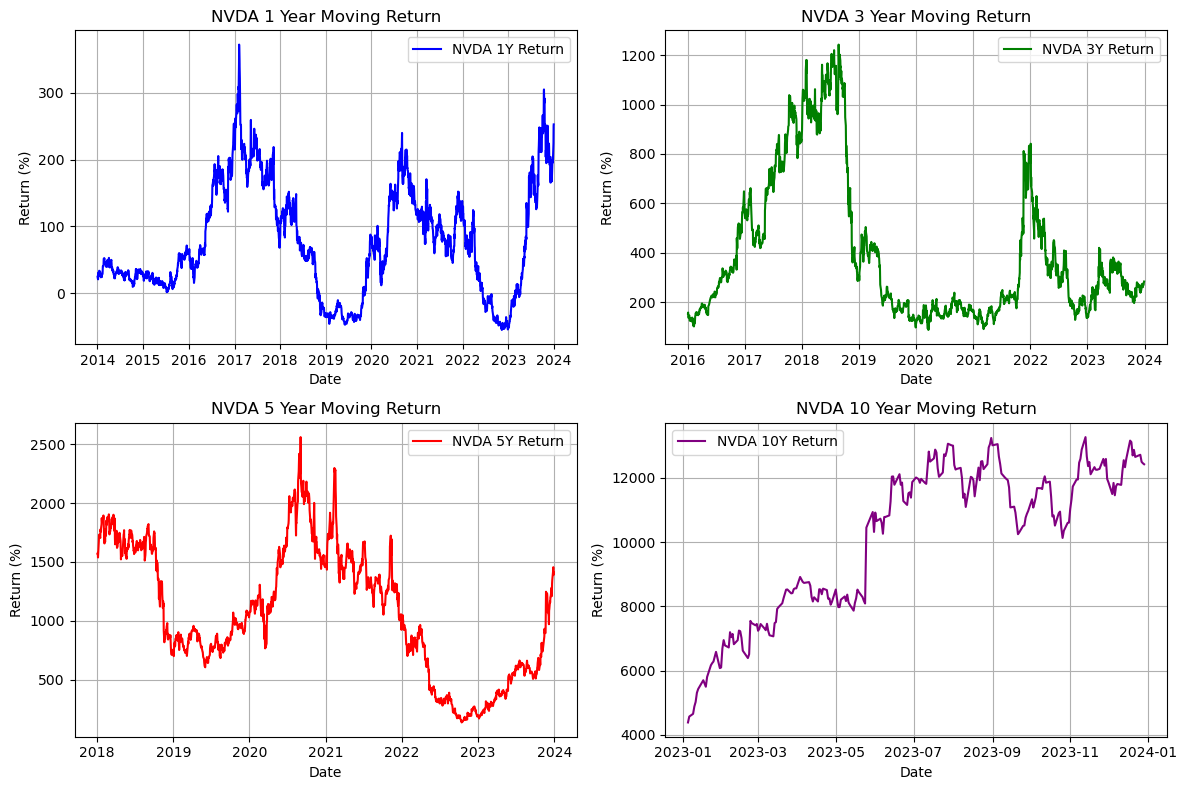

In [19]:
# Plotting the returns for NVDA
plt.figure(figsize=(12, 8))

# 1 Year Return
plt.subplot(221)
plt.plot(nvda_returns['Date'], nvda_returns['NVDA_Return_1'], label='NVDA 1Y Return', color='blue')
plt.title('NVDA 1 Year Moving Return')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True)

# 3 Year Return
plt.subplot(222)
plt.plot(nvda_returns['Date'], nvda_returns['NVDA_Return_3'], label='NVDA 3Y Return', color='green')
plt.title('NVDA 3 Year Moving Return')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True)

# 5 Year Return
plt.subplot(223)
plt.plot(nvda_returns['Date'], nvda_returns['NVDA_Return_5'], label='NVDA 5Y Return', color='red')
plt.title('NVDA 5 Year Moving Return')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True)

# 10 Year Return
plt.subplot(224)
plt.plot(nvda_returns['Date'], nvda_returns['NVDA_Return_10'], label='NVDA 10Y Return', color='purple')
plt.title('NVDA 10 Year Moving Return')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### NVDA return from year 1 to year 10 has increased significantly over the years. The total return for NVDA over 5 year is  abt 1,707.03% which means if you invested $100 in NVDA stock 5 year ago would worth now at lease $1800 today if you reivested dividend and capital gain back  into the fund.

In [20]:
# Merge the returns DataFrames for NVDA, META, IA, and AMD
returns_df = nvda_returns.merge(meta_returns, on='Date')
returns_df = returns_df.merge(ia_returns, on='Date')
returns_df = returns_df.merge(amd_returns, on='Date')

In [21]:
# Calculate the correlation matrix
correlation_matrix = returns_df[['NVDA_Return_1', 'NVDA_Return_3', 'NVDA_Return_5', 'NVDA_Return_10',
                                  'META_Return_1', 'META_Return_3', 'META_Return_5', 'META_Return_10',
                                  'IA_Return_1', 'IA_Return_3', 'IA_Return_5', 'IA_Return_10',
                                  'AMD_Return_1', 'AMD_Return_3', 'AMD_Return_5', 'AMD_Return_10']].corr()
# Display the correlation matrix
correlation_matrix.tail()

,NVDA_Return_1,NVDA_Return_3,NVDA_Return_5,NVDA_Return_10,META_Return_1,META_Return_3,META_Return_5,META_Return_10,IA_Return_1,IA_Return_3,IA_Return_5,IA_Return_10,AMD_Return_1,AMD_Return_3,AMD_Return_5,AMD_Return_10
IA_Return_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD_Return_1,0.890008,0.116391,0.875047,0.816293,0.939920,0.587646,0.919544,0.127108,NaN,NaN,NaN,NaN,1.000000,-0.208251,-0.261221,0.171071
AMD_Return_3,-0.337652,0.776463,-0.241251,-0.139766,-0.350762,0.326862,-0.370137,0.683375,NaN,NaN,NaN,NaN,-0.208251,1.000000,0.756926,0.165184
AMD_Return_5,-0.550878,0.533818,-0.131982,-0.289319,-0.365321,0.246124,-0.301730,0.438029,NaN,NaN,NaN,NaN,-0.261221,0.756926,1.000000,0.485792
AMD_Return_10,-0.120160,0.272761,0.377471,0.098598,0.193969,0.361022,0.296766,-0.098104,NaN,NaN,NaN,NaN,0.171071,0.165184,0.485792,1.000000


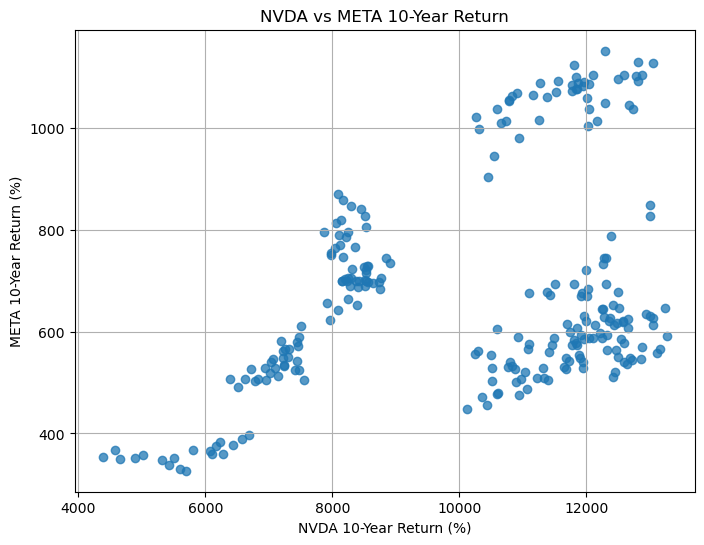

In [22]:
# Select the data for NVDA and META 10-year returns
scatter_data = returns_df[['NVDA_Return_10', 'META_Return_10']].dropna()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['NVDA_Return_10'], scatter_data['META_Return_10'], alpha=0.75)
plt.title('NVDA vs META 10-Year Return')
plt.xlabel('NVDA 10-Year Return (%)')
plt.ylabel('META 10-Year Return (%)')
plt.grid(True)
plt.show()

#### META AND NDA are positively correlated moving in the same direction, when META 10year return increased , NVDA returen moved in tandem. 

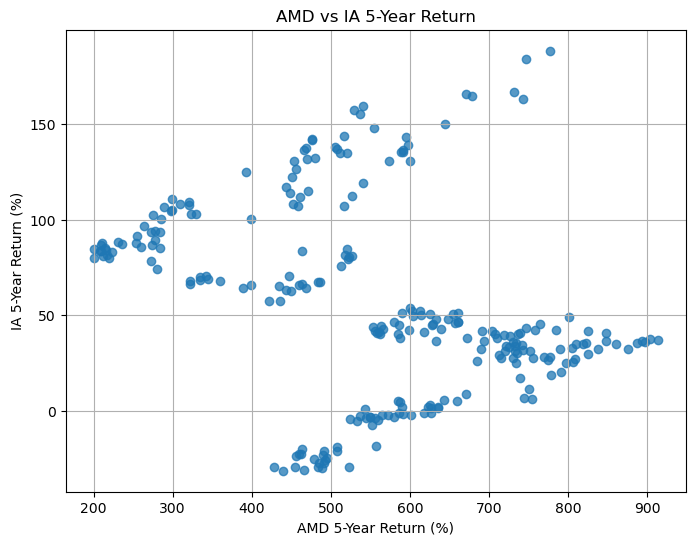

In [23]:
# Select the data for AMD and IA 3-year returns
scatter_data = returns_df[['AMD_Return_5', 'META_Return_5']].dropna()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['AMD_Return_5'], scatter_data['META_Return_5'], alpha=0.75)
plt.title('AMD vs IA 5-Year Return')
plt.xlabel('AMD 5-Year Return (%)')
plt.ylabel('IA 5-Year Return (%)')
plt.grid(True)
plt.show()

#### AMD and AI are also positively correlated. 

# Measure of Risk

Beta is a measure of risk commonly used to compare the volatility of stocks, mutual funds, or ETFs to that of the overall market. The Nasdaq Index is the base for calculating beta for tech stocks and has a beta value of 1.0. Securities with betas below 1 have historically been less volatile than the market. While securities with betas above 1, have historically been more volatile than the market. The beta is calculated using data over a 5-year period. A company with a higher beta has greater risk and also greater expected returns.¶

In [24]:
#view DataFrame
# SPY is an ETF that holds every stock that makes up the S&P 500. For our purposes SPY is an appropriate representation of the market
# as its returns mirror the returns of the S&P 500.
spy_df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,SPY,476.299988,477.850006,473.850006,477.709991,461.611755,72668200
1,2022-01-04,SPY,479.220001,479.980011,475.579987,477.549988,461.457123,71178700
2,2022-01-05,SPY,477.160004,477.980011,468.279999,468.380005,452.596191,104538900
3,2022-01-06,SPY,467.890015,470.820007,465.429993,467.940002,452.171021,86858900
4,2022-01-07,SPY,467.950012,469.200012,464.649994,466.089996,450.383331,85111600


## Calculate Returns

- We opted to use log returns over simple returns for various advantages including additivity, approximation of continuous compounding and handling of extreme values.

- Log returns are calculated using the formula: rt=ln⁡(Pt/Pt−1) Where Pt​ is the price at time t and Pt−1 is the price at time t−1.

In [25]:
# Calculate the daily Stock Logarithmic(log) Returns for all four tickers
stock_data_df['Stock Log Returns'] = np.log(stock_data_df['Adj Close'] / stock_data_df['Adj Close'].shift(1))

# The Adj Close column is used because it takes into account dividends, splits, and other corporate actions and thus provides an easy way
# to evaluate stock performance. 

#view dataframe
stock_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Stock Log Returns
0,NVDA,2013-01-02,3.1400,3.1825,3.1275,3.1800,2.935840,47883600,1.273885,NaN
1,NVDA,2013-01-03,3.1800,3.2175,3.1450,3.1825,2.938147,29888800,0.078616,0.000785
2,NVDA,2013-01-04,3.1875,3.2975,3.1775,3.2875,3.035086,52496800,3.137255,0.032461
3,NVDA,2013-01-07,3.2850,3.2950,3.1700,3.1925,2.947381,61073200,-2.815830,-0.029323
4,NVDA,2013-01-08,3.2000,3.2100,3.1000,3.1225,2.882755,46642400,-2.421875,-0.022171


In [26]:
# Calculate the log daily Returns for the SPY Index
spy_df['Spy Log Returns'] = np.log(spy_df['Adj Close'] / spy_df['Adj Close'].shift(1))

# View Dataframe
spy_df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Spy Log Returns
0,2022-01-03,SPY,476.299988,477.850006,473.850006,477.709991,461.611755,72668200,NaN
1,2022-01-04,SPY,479.220001,479.980011,475.579987,477.549988,461.457123,71178700,-0.000335
2,2022-01-05,SPY,477.160004,477.980011,468.279999,468.380005,452.596191,104538900,-0.019389
3,2022-01-06,SPY,467.890015,470.820007,465.429993,467.940002,452.171021,86858900,-0.000940
4,2022-01-07,SPY,467.950012,469.200012,464.649994,466.089996,450.383331,85111600,-0.003961


## Merge stock_data_df with spy_df to incorporate SPY returns

In [27]:
#Merge stock data df with Spy log returns

spy_merged_returns_df = pd.merge(stock_data_df,spy_df[['Date', 'Spy Log Returns']], on = "Date", how = "inner")

#view the merged df

spy_merged_returns_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Stock Log Returns,Spy Log Returns
0,NVDA,2022-01-03,298.149994,307.109985,297.850006,301.209991,300.781036,39154700,1.026328,0.023854,NaN
1,META,2022-01-03,338.299988,341.079987,337.190002,338.540009,338.181183,14537900,0.070949,0.006490,NaN
2,AMD,2022-01-03,145.139999,151.649994,145.020004,150.240005,150.240005,59396600,3.513853,0.043115,NaN
3,NVDA,2022-01-04,302.769989,304.679993,283.489990,292.899994,292.482849,52715400,-3.259899,-0.027977,-0.000335
4,META,2022-01-04,339.950012,343.089996,331.869995,336.529999,336.173309,15998000,-1.006034,-0.005955,-0.000335


In [28]:
#filter the merged df for 1 year (2022 - 2023)

# Create a datetime object for January 1, 2022
start_date = pd.Timestamp('2022-01-01')

# Filter the DataFrame to include only rows with dates after January 1, 2022
spy_merged_one_year_df = spy_merged_returns_df[spy_merged_returns_df['Date'] >= start_date]

#Create a copy
spy_merged_one_year_df = spy_merged_one_year_df.copy()

# Print the filtered DataFrame
spy_merged_one_year_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Stock Log Returns,Spy Log Returns
0,NVDA,2022-01-03,298.149994,307.109985,297.850006,301.209991,300.781036,39154700,1.026328,0.023854,NaN
1,META,2022-01-03,338.299988,341.079987,337.190002,338.540009,338.181183,14537900,0.070949,0.006490,NaN
2,AMD,2022-01-03,145.139999,151.649994,145.020004,150.240005,150.240005,59396600,3.513853,0.043115,NaN
3,NVDA,2022-01-04,302.769989,304.679993,283.489990,292.899994,292.482849,52715400,-3.259899,-0.027977,-0.000335
4,META,2022-01-04,339.950012,343.089996,331.869995,336.529999,336.173309,15998000,-1.006034,-0.005955,-0.000335


In [29]:
#separate the merged dataframe for each ticker, reset the indexes for each new df. Each ticker retains "Spy Log Returns" columns necessary 
#for further analysis. 

nvda_df = spy_merged_one_year_df[spy_merged_one_year_df['Ticker'] == "NVDA"].reset_index(drop = True)
meta_df = spy_merged_one_year_df[spy_merged_one_year_df['Ticker'] == "META"].reset_index(drop = True)
ai_df = spy_merged_one_year_df[spy_merged_one_year_df['Ticker'] == "AI"].reset_index(drop = True)
amd_df = spy_merged_one_year_df[spy_merged_one_year_df['Ticker'] == "AMD"].reset_index(drop = True)

#view example of resulting df for one stock
nvda_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Stock Log Returns,Spy Log Returns
0,NVDA,2022-01-03,298.149994,307.109985,297.850006,301.209991,300.781036,39154700,1.026328,0.023854,NaN
1,NVDA,2022-01-04,302.769989,304.679993,283.489990,292.899994,292.482849,52715400,-3.259899,-0.027977,-0.000335
2,NVDA,2022-01-05,289.489990,294.160004,275.329987,276.040009,275.646851,49806400,-4.646095,-0.059286,-0.019389
3,NVDA,2022-01-06,276.399994,284.380005,270.649994,281.779999,281.378693,45418600,1.946456,0.020581,-0.000940
4,NVDA,2022-01-07,281.410004,284.220001,270.570007,272.470001,272.081970,40993900,-3.176860,-0.033598,-0.003961


## Calculate the Beta using a formula

In [30]:
# List of stock tickers
stock_dfs = {
    'NVDA': nvda_df,
    'META': meta_df,
    'AMD': amd_df,
    'AI': ai_df
}

# Dictionary to hold beta values
beta_values = {}

# Process each stock
for ticker, df in stock_dfs.items():

    #remove NaN values
    df = df.dropna(subset=['Stock Log Returns', 'Spy Log Returns'])

    # Calculate covariance and variance
    covariance = np.cov(df['Stock Log Returns'], df['Spy Log Returns'])[0, 1]
    variance = np.var(df['Spy Log Returns'])

    # Calculate and store beta
    beta = (covariance / variance)
    beta_values[ticker] = beta

# Print the beta values for each stock
for ticker, beta in beta_values.items():
    print(f"The beta of {ticker} relative to the Nasdaq is: {beta:.2f}")

The beta of NVDA relative to the Nasdaq is: 2.17
The beta of META relative to the Nasdaq is: 1.76
The beta of AMD relative to the Nasdaq is: 2.04
The beta of AI relative to the Nasdaq is: 4.11


### Calculate the Beta using Scatterplots and regression lines

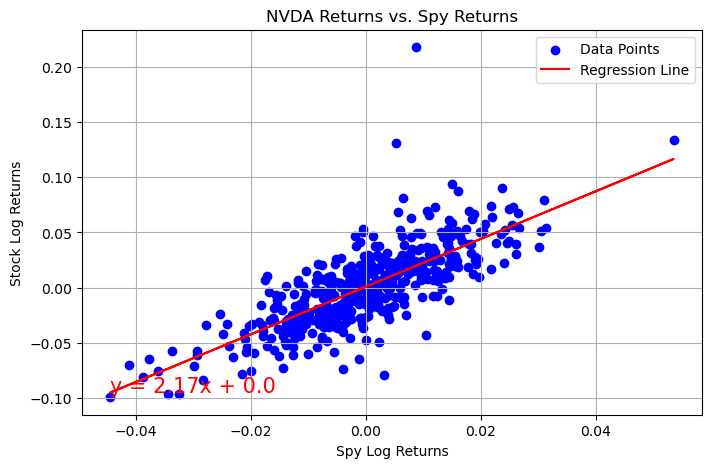

<Figure size 640x480 with 0 Axes>

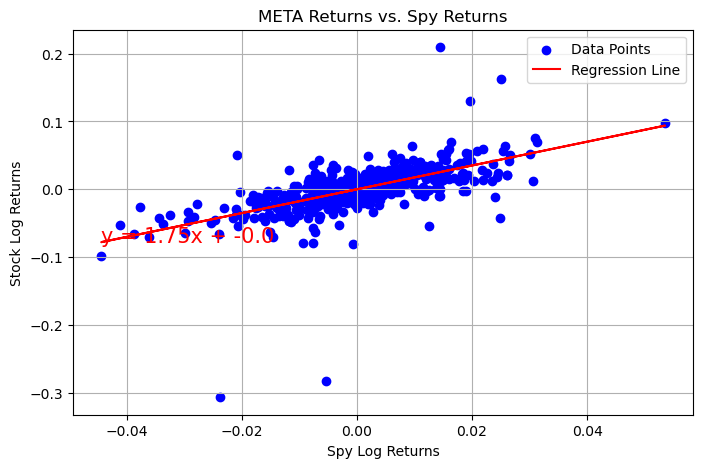

<Figure size 640x480 with 0 Axes>

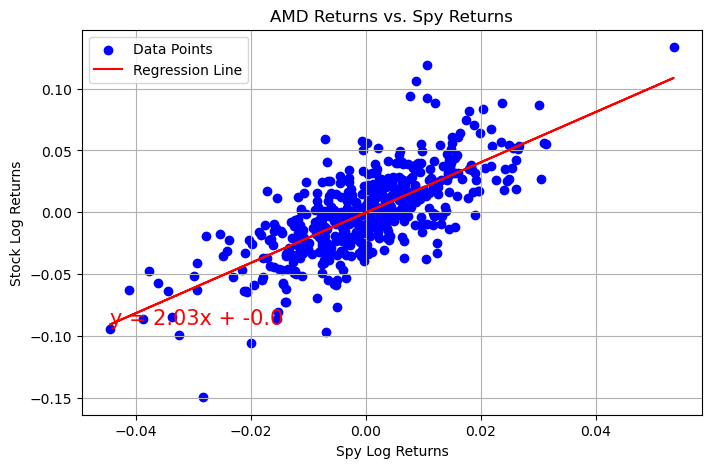

<Figure size 640x480 with 0 Axes>

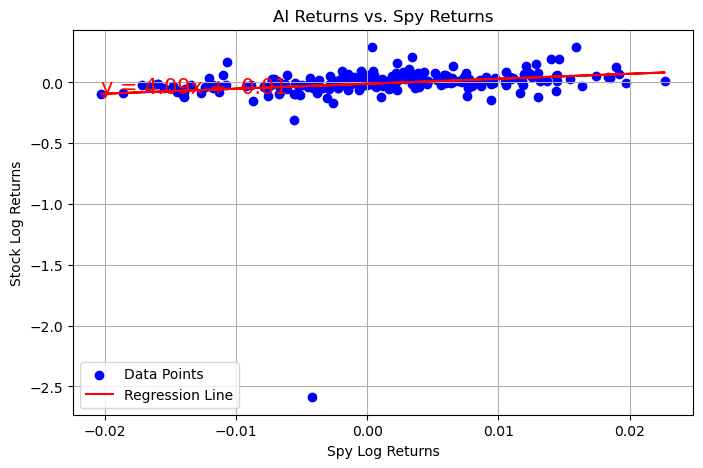

 The beta of NVDA: relative to the index is 2.17
 The beta of META: relative to the index is 1.75
 The beta of AMD: relative to the index is 2.03
 The beta of AI: relative to the index is 4.09


<Figure size 640x480 with 0 Axes>

In [31]:
# Create a dictionary to store the different stock dataframes 
stock_dfs = {
    'NVDA': nvda_df,
    'META': meta_df,
    'AMD': amd_df,
    'AI': ai_df
}

# create a dictionary to store beta values for each stock 
betas = {}

# loop through each stock dataframe
for ticker, df in stock_dfs.items():
    # Drop NaN values from the columns used in regression
    df = df.dropna(subset=['Stock Log Returns', 'Spy Log Returns'])
    
    # Perform linear regression
    (slope, intercept, r_value, pvalue, stderr) = linregress(df['Spy Log Returns'], df['Stock Log Returns'])
             
    # Store the beta in the dictionary
    betas[ticker] = slope
            
    # Plot the scatterplot and regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Spy Log Returns'], df['Stock Log Returns'], color='blue', label='Data Points')
    plt.title(f'{ticker} Returns vs. Spy Returns')
    plt.xlabel('Spy Log Returns')
    plt.ylabel('Stock Log Returns') 

    # Calculate the regression line values
    x = np.array(df['Spy Log Returns'])
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot the regression line
    plt.plot(x, regress_values, "r-", label='Regression Line') 
    plt.annotate(line_eq, (x.min(), regress_values.min()), fontsize=15, color="red")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.tight_layout()

# Print beta for each stock 
for ticker, beta in betas.items():
    print(f" The beta of {ticker}: relative to the index is {beta:.2f}")


### - Each of the stocks' returns resulted in a beta that is greater than 1. This signifies that the volatility of the prices exceeds that of the market. Small cap and technology stocks typically have higher betas than the market benchmark. Therefore, adding stocks to a portfolio will raise its risk, but it may also improve its expected return.

# Measuring Risk using Drawdown of Past 4 Years of Data
- A drawdown is defined as the percent of declin in the value of a security over a period before it bounces bak to the original value or beyond.
- It is expressed as the difference between the highest, the peak value of that stock, and the loswest, the trough value of the stock.
- To calculate the drawdown helps identify the risk associated with the particular investment in that stock.

In [32]:
# Define start_date and end_date
start_date = "01-01-20" 
end_date = "12-29-23"    

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the DataFrame based on the start_date and end_date
nvda_df_filter = nvda_df[(nvda_df["Date"] >= start_date) & (nvda_df["Date"] <= end_date)]
nvda_df_filter = nvda_df_filter.reset_index(drop=True).sort_values(by='Date')

meta_df_filter = meta_df[(meta_df["Date"] >= start_date) & (meta_df["Date"] <= end_date)]
meta_df_filter = meta_df_filter.reset_index(drop=True).sort_values(by='Date')


amd_df_filter = amd_df[(amd_df["Date"] >= start_date) & (amd_df["Date"] <= end_date)]
amd_df_filter = amd_df_filter.reset_index(drop=True).sort_values(by='Date')


ai_df_filter = ai_df[(ai_df["Date"] >= start_date) & (ai_df["Date"] <= end_date)]
ai_df_filter = ai_df_filter.reset_index(drop=True).sort_values(by='Date')


<Figure size 2500x2000 with 0 Axes>

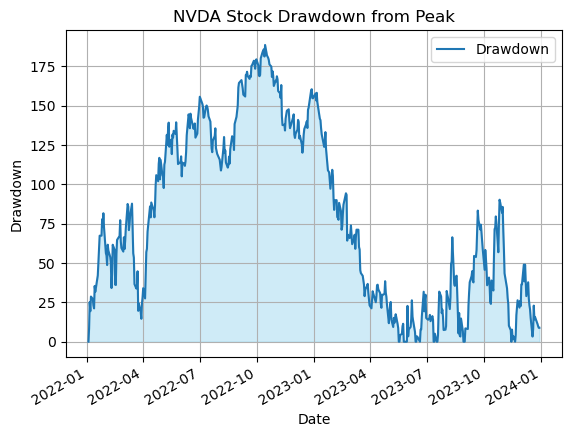

In [33]:
# Calculating drawdown for NVDA stock
nvda_df_filter['Cumulative Max'] = nvda_df_filter['Adj Close'].cummax()
nvda_df_filter['Drawdown'] = nvda_df_filter['Cumulative Max'] - nvda_df_filter['Adj Close']

# Plot the drawdown
plt.figure(figsize=(25, 20))
nvda_df_filter.plot(x='Date', y ='Drawdown')
plt.fill_between(nvda_df_filter['Date'], nvda_df_filter['Drawdown'], color='skyblue', alpha=0.4)
plt.title('NVDA Stock Drawdown from Peak')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

#### - The NVDA stock graph is showing the ups and downs of the stock for the past year. After reaching its peak, it has continued to drop.
#### - This suggests that the stock is very volatile, and it is risky to invest in at this time.

<Figure size 1000x600 with 0 Axes>

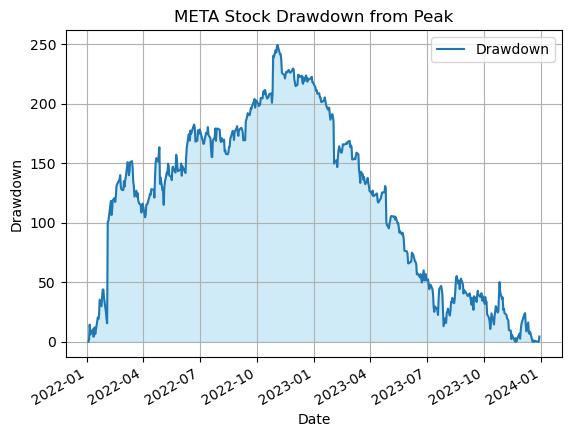

In [34]:
# Calculate drawdown for META stock
meta_df_filter['Cumulative Max'] = meta_df_filter['Adj Close'].cummax()
meta_df_filter['Drawdown'] = meta_df_filter['Cumulative Max'] - meta_df_filter['Adj Close']

# Plot the drawdown
plt.figure(figsize=(10, 6))
meta_df_filter.plot(x='Date', y ='Drawdown')
plt.fill_between(meta_df_filter['Date'], meta_df_filter['Drawdown'], color='skyblue', alpha=0.4)
plt.title('META Stock Drawdown from Peak')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

#### - META stock drawdown graph indicates that there has been a pretty steep and steady decline over time.
#### - This suggests that it might be riskier to invest at this time.

<Figure size 1000x600 with 0 Axes>

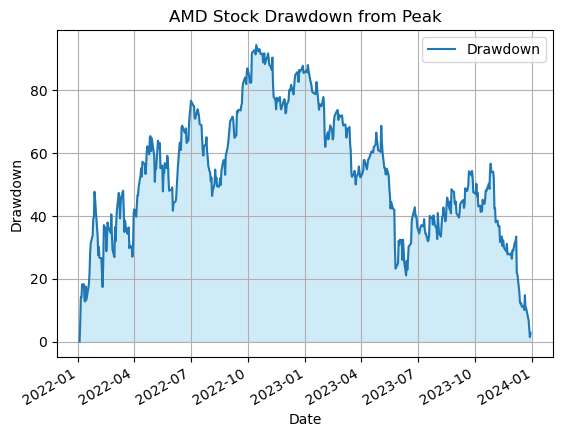

In [35]:
# Calculate drawdown for AMD stock
amd_df_filter['Cumulative Max'] = amd_df_filter['Adj Close'].cummax()
amd_df_filter['Drawdown'] = amd_df_filter['Cumulative Max'] - amd_df_filter['Adj Close']

# Plot the drawdown
plt.figure(figsize=(10, 6))
amd_df_filter.plot(x='Date', y ='Drawdown')
plt.fill_between(amd_df_filter['Date'], amd_df_filter['Drawdown'], color='skyblue', alpha=0.4)
plt.title('AMD Stock Drawdown from Peak')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

#### - The AMD Stock has had a bit of a rollercoaster year. It has had a shap falls from its highest point, making it very unpredictable.
#### - The AMD Stock is risky to invest in at this time. 

<Figure size 1000x600 with 0 Axes>

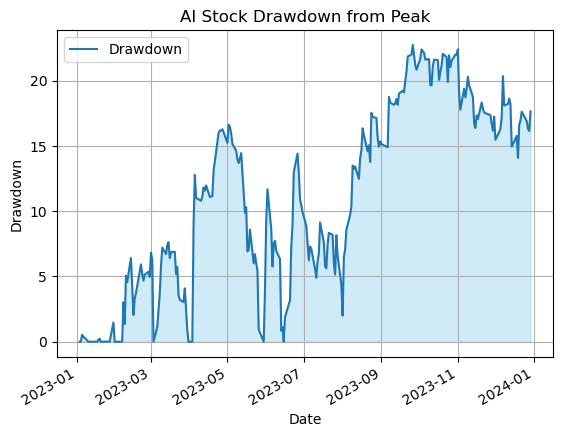

In [36]:
# Calculate drawdown for AI stock
ai_df_filter['Cumulative Max'] = ai_df_filter['Adj Close'].cummax()
ai_df_filter['Drawdown'] = ai_df_filter['Cumulative Max'] - ai_df_filter['Adj Close']

# Plot the drawdown
plt.figure(figsize=(10, 6))
ai_df_filter.plot(x='Date', y ='Drawdown')
plt.fill_between(ai_df_filter['Date'], ai_df_filter['Drawdown'], color='skyblue', alpha=0.4)
plt.title('AI Stock Drawdown from Peak')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

#### - The AI stock has had its up and downs when it comes to drawdowsm, nut nothing too drastic. 
#### - In terms of risks, the AI stock is somewhat steady and not too risky to invest in at this moment.

# Conclusion for Drawdowns 

#### - Based on the finding of the graphs, META is is dropping a lot, which indicates it is risky to invest in. NVDA goes up and down a lot,which makes it very unpredictable. 
#### - AMD has some ups and downs as well but it is not as unpredictable as NVDA. However,  AI stock is more stable and no significant changes has occurred yet. 

In [37]:
! pwd

/Users/bezaabebe/Documents/Stock_project_1
